## 实验任务:爬取哔哩哔哩热门视频内容
- 目标网站 https://www.bilibili.com/v/popular/all?spm_id_from=333.851.b_7072696d61727950616765546162.3
- 目标需求 热门标题,UP名称,播放量,封面图片

- 第一步:通过分析页面,已经查询查询到数据包的链接

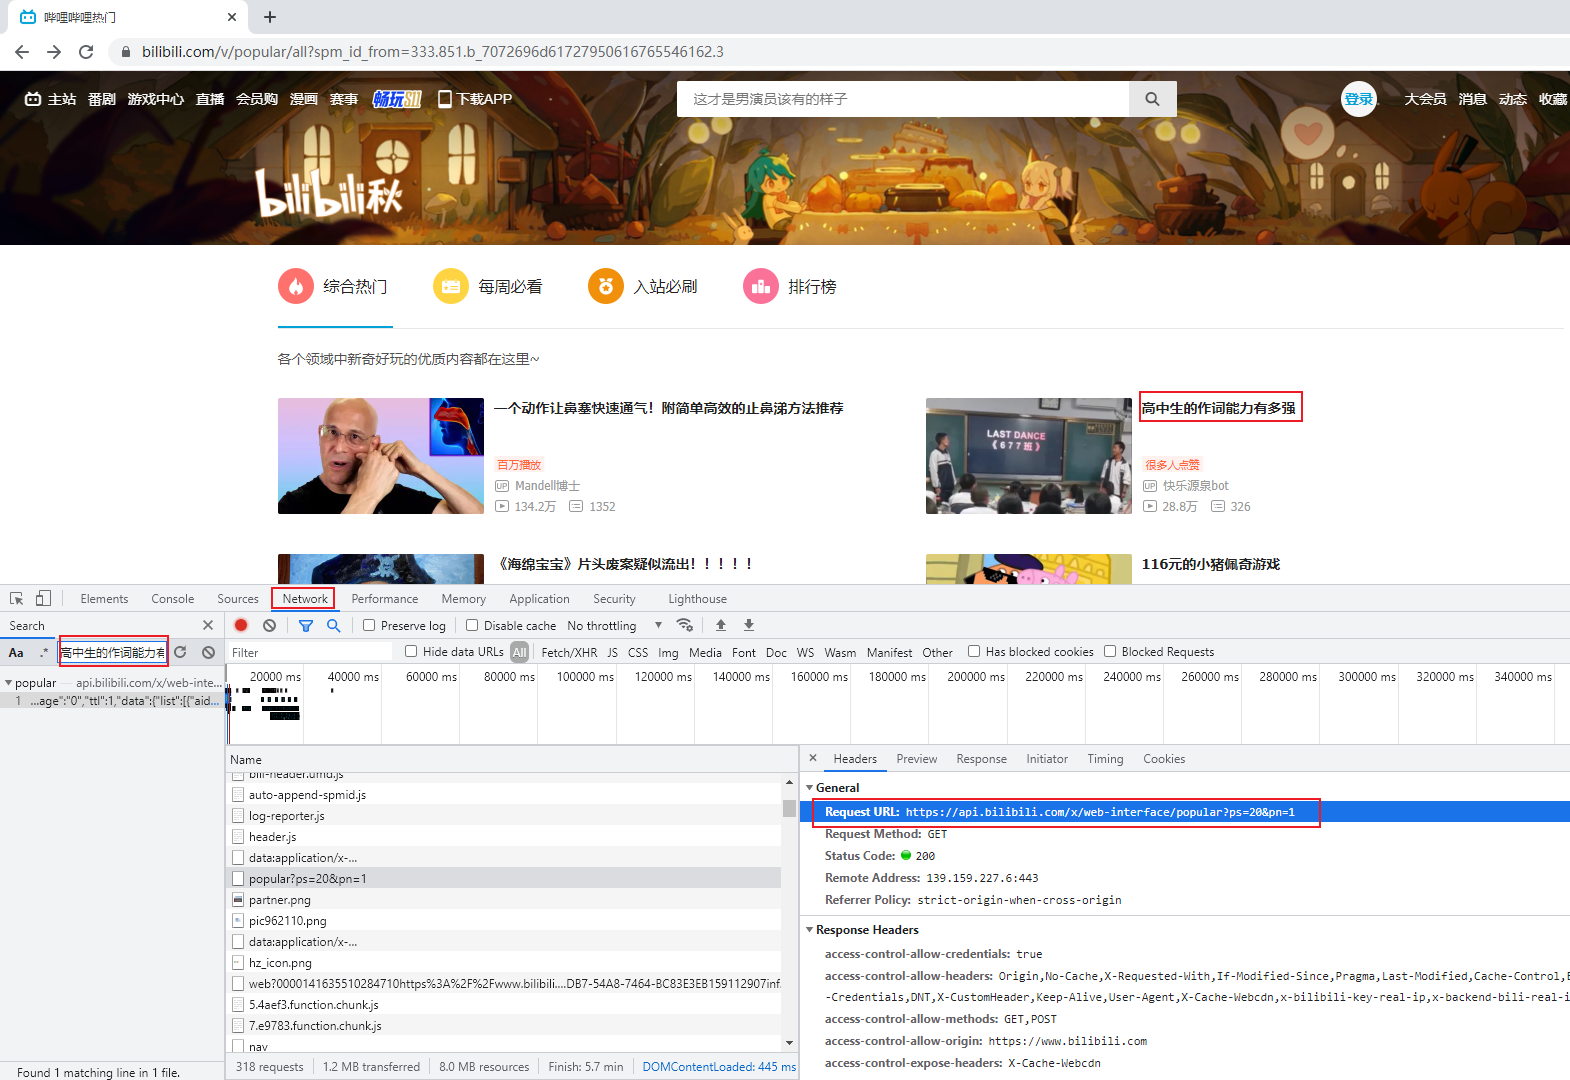

- 第二步 : 核对数据包中的数据是否满足所有需求

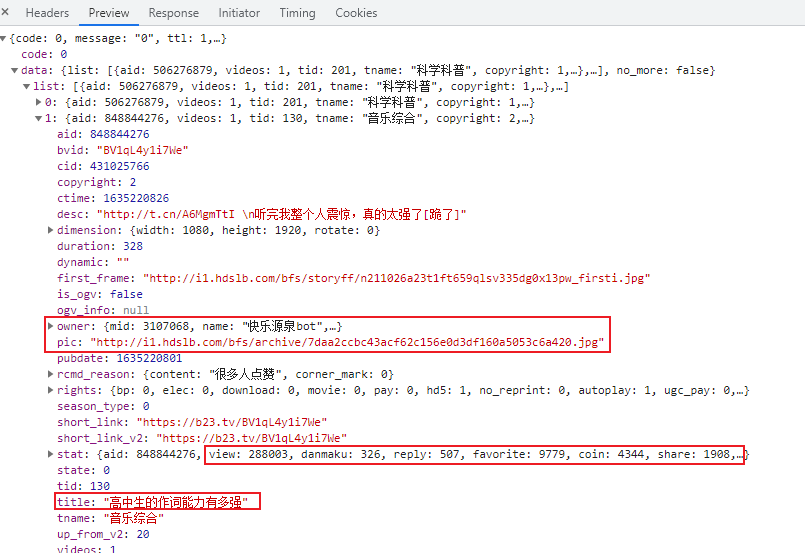

- 第三步 :复制Response的内容到网站 https://www.json.cn/# 可将json结构化,更加清晰观察

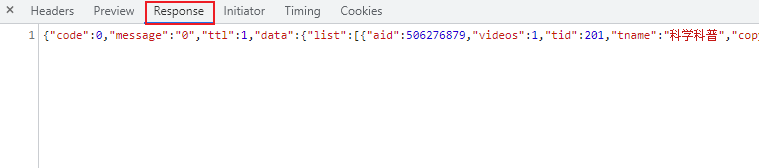

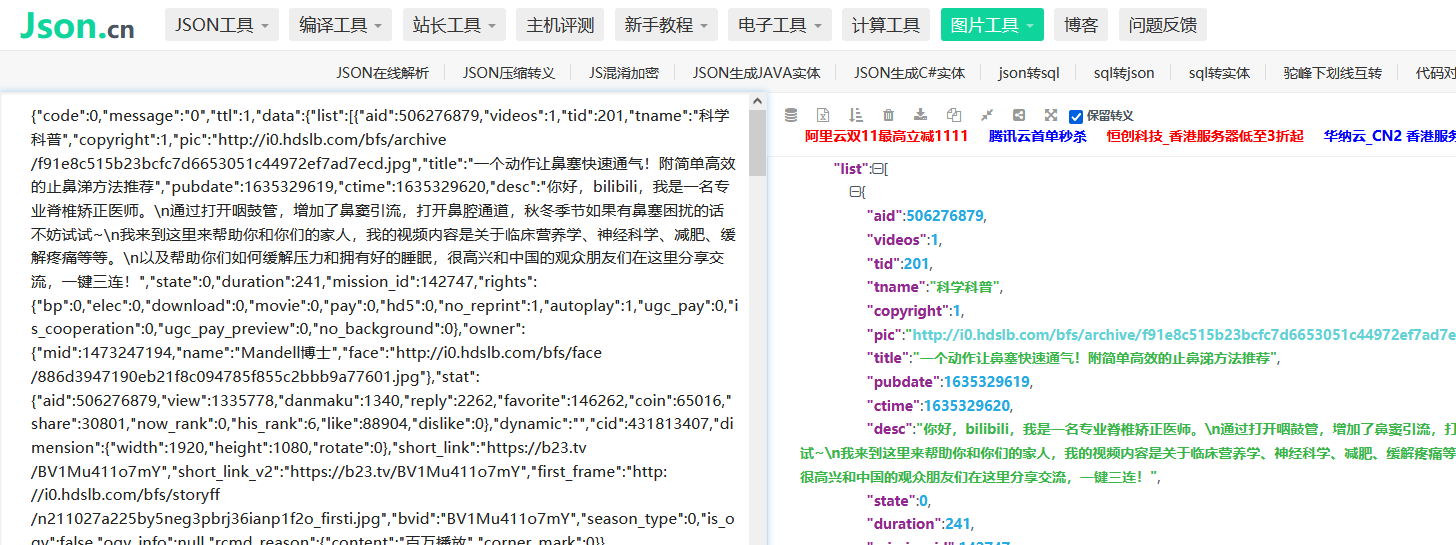

- 第四步 :利用https://curlconverter.com/# 生成请求头

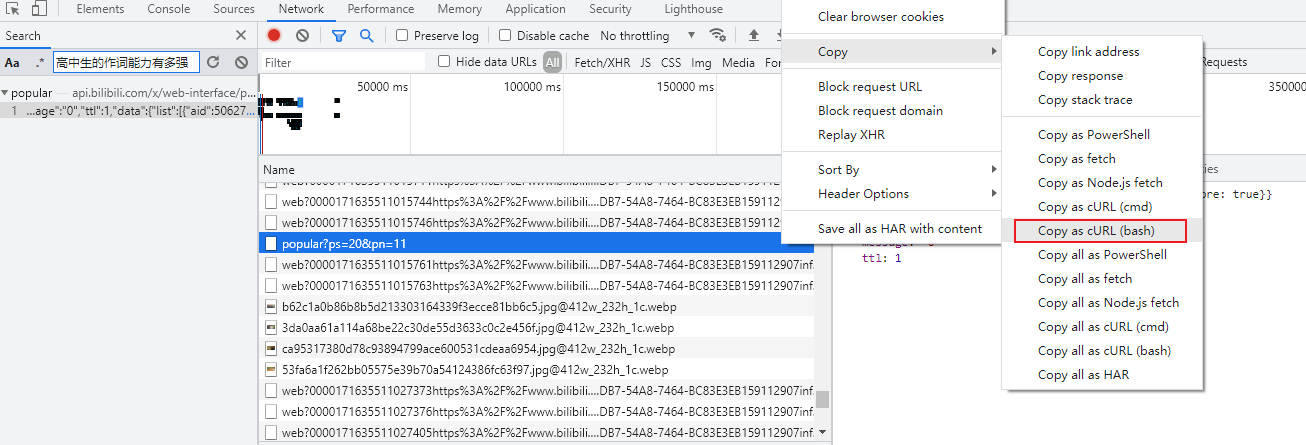

In [ ]:
# 通过工具创建的链接请求方式

import requests

headers = {
    'authority': 'api.bilibili.com',
    'sec-ch-ua': '"Chromium";v="92", " Not A;Brand";v="99", "Google Chrome";v="92"',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36',
    'accept': '*/*',
    'origin': 'https://www.bilibili.com',
    'sec-fetch-site': 'same-site',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.bilibili.com/',
    'accept-language': 'zh-CN,zh;q=0.9',
    'cookie': 'buvid3=65476E0E-2F84-6F32-06B7-6B36945F636611247infoc; _uuid=A2490FE5-0DB7-54A8-7464-BC83E3EB159112907infoc; blackside_state=1; rpdid=|(ku|kmm~~uR0J\'uY|Y|JlJuR; CURRENT_QUALITY=32; CURRENT_FNVAL=976; innersign=0',
}

params = (
    ('ps', '20'),
    ('pn', '1'),
)

response = requests.get('https://api.bilibili.com/x/web-interface/popular', headers=headers, params=params)

#NB. Original query string below. It seems impossible to parse and
#reproduce query strings 100% accurately so the one below is given
#in case the reproduced version is not "correct".
# response = requests.get('https://api.bilibili.com/x/web-interface/popular?ps=20&pn=1', headers=headers)

In [ ]:
# 已经提取到数据了,可以看到是字典结构,使用字典的读取数据方式
print(response.text)

In [ ]:
datas = response.json()['data']['list']
datas

In [ ]:
results = []
for data in datas:
    result ={
            '标题': data['title'],
            '视频分类':data['tname'],
            'aid': data['aid'],
            'bvid': data['bvid'],
            '视频描述': data['desc'],
            '视频封面': data['pic'],
            'up主': data['owner']['name'], 
            '视频链接': data['short_link'],
            '投币数': data['stat']['coin'],
            '收藏数': data['stat']['favorite'],
            '弹幕数': data['stat']['danmaku'],
            '喜欢数': data['stat']['like'],
            '观看数': data['stat']['view'],
            '分享数': data['stat']['share'],
    }
    print('>>正在爬取: ',data['title'])
    results.append(result)

# Task8作业 - 爬取哔哩哔哩每周必看内容

- 目标路径:https://www.bilibili.com/v/popular/weekly?num=136
- 目标需求 热门标题,UP名称,播放量,封面图片;

In [1]:
import requests
import pandas as pd
import time

In [2]:
def get_datas(num):
    headers = {
        'authority': 'api.bilibili.com',
        'sec-ch-ua': '"Chromium";v="92", " Not A;Brand";v="99", "Google Chrome";v="92"',
        'accept': 'application/json, text/plain, */*',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36',
        'origin': 'https://www.bilibili.com',
        'sec-fetch-site': 'same-site',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': 'https://www.bilibili.com/',
        'accept-language': 'zh-CN,zh;q=0.9',
        'cookie': 'buvid3=65476E0E-2F84-6F32-06B7-6B36945F636611247infoc; _uuid=A2490FE5-0DB7-54A8-7464-BC83E3EB159112907infoc; blackside_state=1; rpdid=|(ku|kmm~~uR0J\'uY|Y|JlJuR; CURRENT_QUALITY=32; CURRENT_FNVAL=976; video_page_version=v_old_home_8; sid=kukub9et; innersign=0',
    }

    params = (
        ('number', num),
    )
    response = requests.get('https://api.bilibili.com/x/web-interface/popular/series/one', headers=headers, params=params)
    datas=response.json()['data']['list']
    results = []
    for data in datas:
        result ={
                '标题': data['title'],
                '视频分类':data['tname'],
                'aid': data['aid'],
                'bvid': data['bvid'],
                '视频描述': data['desc'],
                '视频封面': data['pic'],
                'up主': data['owner']['name'], 
                '视频链接': data['short_link'],
                '投币数': data['stat']['coin'],
                '收藏数': data['stat']['favorite'],
                '弹幕数': data['stat']['danmaku'],
                '喜欢数': data['stat']['like'],
                '观看数': data['stat']['view'],
                '分享数': data['stat']['share'],
        }
        print('    >>正在爬取: ',data['title'])
        results.append(result)
    return results
        
def main():
    new_results = []
    for i in range(130,139):
        print(">>正在爬取: ,第",i,"期")
        results_all = get_datas(i)
        [new_results.append(result) for result in results_all]
        time.sleep(3)  
    a = pd.DataFrame(new_results)
    a.to_excel(r'G:\Git_\网络爬虫\Python爬虫实战-和鲸社区\输出\Task8.xlsx',encoding='utf-8')
    
if __name__ == '__main__':
    main()

>>正在爬取: ,第 130 期
    >>正在爬取:  史上最离谱随机挑战！居然随机到去小潮院长蹭饭...【第三期】
    >>正在爬取:  熬夜的好处，你知道的太晚了
    >>正在爬取:  社 交 废 物 2
    >>正在爬取:  屏幕有后坐 打枪更快乐
    >>正在爬取:  上海第一网红自助餐一绪寿喜烧，人均200+的日料火锅，以假乱真、食材回收
    >>正在爬取:  《丑到不想起标题》
    >>正在爬取:  “看我视频的孩子，长大后，他们是不是会比我们这一代更好呢？”【破圈相对论Ep02】
    >>正在爬取:  （这也能解说？！）史上最燃的弹珠大赛【第六弹】激烈缠斗！热血厮杀！重回巅峰？！
    >>正在爬取:  耗时五天“佛跳墙”终于大功告成，金锅一开四伯感叹这辈子值了
    >>正在爬取:  【短的发布会】加量不加价，iPhone13不负王守义厚望果然十三香！
    >>正在爬取:  一口气看完，成龙历险记1-5季！100集！爷青回
    >>正在爬取:  对不起 被我装到了！
    >>正在爬取:  我又去“当兵”了
    >>正在爬取:  1910-2010 百年变迁，中国校服的青春之美。
    >>正在爬取:  真，真熊猫人？
    >>正在爬取:  做到完美哪有什么捷径，唯有用心！
    >>正在爬取:  真·社交牛逼症！在新疆，跟陌生阿姨回家吃饭，还切磋了舞蹈💃
    >>正在爬取:  把1000块的海鲜高汤，倒进200度的高温油锅？？ohhh~针不戳！
    >>正在爬取:  课 后 请 勿 对 对 子 3.0 ！！！【第二季】
    >>正在爬取:  他花2年时间，收集384种中国颜色，国人很自豪：美炸了！
    >>正在爬取:  【含剧透】雷电将军哪有这么可爱？
    >>正在爬取:  【布料/4k全屏】105千伏白色雷电降临
    >>正在爬取:  告诉男朋友，我全身都是假的…会发生什么？
    >>正在爬取:  听说你们都在找本人？那俺可不就来了！
    >>正在爬取:  【原神】见证历史！提瓦特首位60级玩家
    >>正在爬取:  爷累了 重开！
    >>正在爬取:  有用又有趣的网站 了解一下?
    >>正在爬取:  【STN快报第六季1】今年最大游戏厂商竟

>>正在爬取: ,第 137 期
    >>正在爬取:  “本以为是恶毒后妈，没想到她在偷偷爱你”【国王排名】
    >>正在爬取:  靠谱盘点141:杀尺帝！EDG送走GEN挺进决赛，DK！下个就是你！
    >>正在爬取:  5G，华为，土耳其——我花了两个月，搞懂了5G背后的秘密
    >>正在爬取:  当你用九十年代的画风打开原神
    >>正在爬取:  《浪漫主义》
    >>正在爬取:  这英特尔12代CPU有点强啊！
    >>正在爬取:  迪迦降临 真人CG特效变身动画 【夜空】
    >>正在爬取:  为了拍到烟花爆炸中心的画面，我们炸了两台穿越机！
    >>正在爬取:  嘿，兄弟！我们好久不见你在哪里？
    >>正在爬取:  史上最离谱随机挑战！居然随机到花少北蹭饭...【第六期】
    >>正在爬取:  《三体》电视剧预告细节解析！是你想看的名场面吗？【培根悖论】
    >>正在爬取:  让子弹飞第二部？《马邦德：无暇赴死》终极预告泄漏～
    >>正在爬取:  【S11全球总决赛】半决赛 10月31日 EDG vs GEN
    >>正在爬取:  【2021共创之夜】完整版回放：欢迎来到王者荣耀！
    >>正在爬取:  笑死！这2元的童年回忆根本吃不完！！！无骨鸡柳
    >>正在爬取:  干！净！又！卫！生！的芦荟汁！送给史上最爱蹭饭的朋友们
    >>正在爬取:  3个词，某宝秒购梦中服装 | 你连tb都不会用！！
    >>正在爬取:  “强加于他人的善意，和恶意有什么区别呢”｜无法超越的动漫台词
    >>正在爬取:  这不是PPT技术，是PPT魔术吧
    >>正在爬取:  元 辅 导
    >>正在爬取:  离家出走半年 ，400万粉不干了！！
    >>正在爬取:  不及时纠正这2个错误，很难拥有腹肌！
    >>正在爬取:  胡桃单曲《嗷》Remix
    >>正在爬取:  【时代少年团】《光环中的少年——“踯躅”》（上）
    >>正在爬取:  这个游戏出现在21世纪还是过于早了
    >>正在爬取:  关于胡桃堂主很喜欢换装的事
    >>正在爬取:  杀手：嗯？目标呢？？
    >>正在爬取:  真·十字回旋镖! 手把手教你做百分百能飞回来的折纸回旋镖
   